In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import math
from scipy import stats
import numpy as np

trips = Table.read_table('trip.csv')

The bike sharing service charges for trips longer than 1800 seconds (half an hour), but shorter trips are free.  Let us examine the distribution of trip durations.

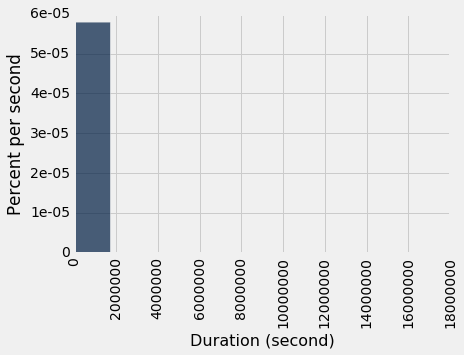

In [8]:
trips.hist("Duration", unit="second")

The default histogram covers all the data using 10 evenly-spaced bins.  It turns out that there are a few very long trips, but most are shorter.  The long trips (outliers) make this histogram **nearly useless**; it just tells us that almost all of the trips take less than 2 million seconds.

We can increase the level of detail in a histogram by using thinner bins.  But even making 100 very thin bars does not help:

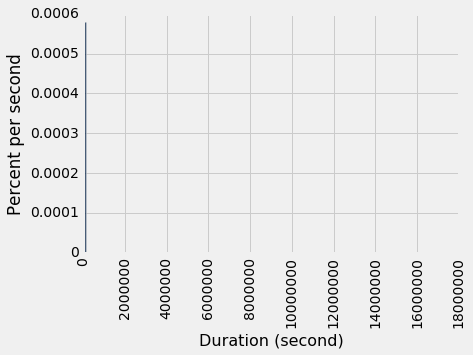

In [85]:
trips.hist("Duration", unit="second", bins=100)

To understand the distribution of trip durations, we'll have to focus on the shorter trips.  Let us find out what trip durations would be reasonable to ignore by finding out how many longer trips there were, as a percentage of all the trips.  We can compute and display a few of these percentages by hand.  Defining a function `percent_of_trips` helps simplify the code.

In [86]:
def percent_of_trips(num_trips):
    """num_trips as a percentage of the total number of trips.
    
    Returns:
      str: A string containing num_trips (the given argument) as a percentage
        of the rows in the trips table."""
    return str(np.round(100 * num_trips / trips.num_rows, 3)) + "%"

million_second_trips = trips.where("Duration", are.above(1000000)).num_rows
hundred_thousand_second_trips = trips.where("Duration", are.above(100000)).num_rows
ten_thousand_second_trips = trips.where("Duration", are.above(10000)).num_rows
print(percent_of_rows(million_second_trips) + " were million-second trips, " +
      percent_of_rows(hundred_thousand_second_trips) + " were hundred-thousand-second trips, and " +
      percent_of_rows(ten_thousand_second_trips) + " were ten-thousand-second trips.")

0.001% were million-second trips, 0.032% were hundred-thousand-second trips, and 1.095% were ten-thousand-second trips.


Knowing that only around $1\%$ of the trips are more than 10,000 seconds, we can try cutting off the histogram there:

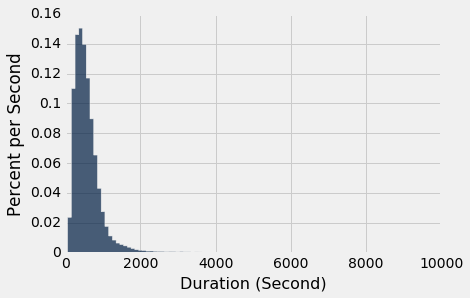

In [87]:
# The backslash \ allows us to continue a line of code on
# the next line, to avoid making a line too wide.
trips.where("Duration", are.below(10000))\
     .hist('Duration', unit='Second', bins=100)

Finally, a useful chart!  We can summarize the distribution of trip durations as follows:

> "The histogram shows that most of the trips took around 15 minutes (900 seconds) or so."

Very few took more than 30 minutes (1800 seconds), possibly because people try to return the bikes before the cutoff time to avoid paying for their trips.  Let us zoom in even further on those trips.

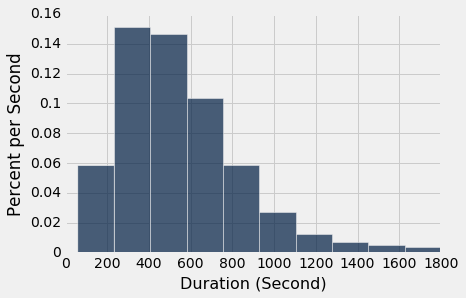

In [37]:
commute = trips.where('Duration', are.below(1800))
commute.hist('Duration', unit='Second')

Again, we can get more detail by specifying a larger number of bins. But the overall shape doesn't change much.

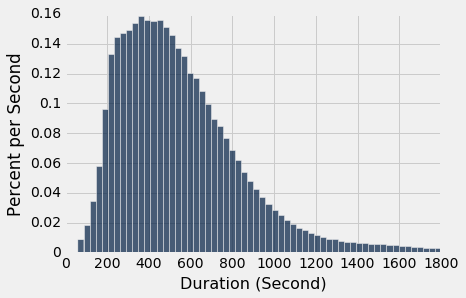

In [38]:
commute.hist('Duration', bins=60, unit='Second')